# By Alik604
## Adapted from https://github.com/rojagtap/eminem_lyrics_generator
> 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
cd /content/drive/My Drive/Data

/content/drive/My Drive/Data


In [0]:
import pandas as pd
import numpy as np
import re
import os
import glob
import json

# Starting Preprocessing - Check point
> This can be disreguarded as data is provided a single .csv

In [0]:
## retain

# !pip install lyricsgenius
# import lyricsgenius
# genius = lyricsgenius.Genius("8AO32_nfbxk_8yNyBYJTnw_4qRjT2Uid1pMSW_XJ_56sBsnNLuXeKxwMMEZmQrQN") # this is a valid key :) 
# artist = genius.search_artist("Eminem", max_songs=100, sort='popularity') # XXXTENTACION 
# for i in range(100):
#   artist.songs[i].save_lyrics()

In [0]:
# lines = []
# i = 1
# for root, dirs, files in os.walk('./raw'):
#     for file in files:
#         if file.endswith('.json') and 'xxxtentacion' in file : # eminem  # xxxtentacion
#             file = open("./raw/" + file)
#             json_data = file.read()
#             data = json.loads(json_data)
#             lines.append(data['lyrics'])
#             i +=1
# print(i)
# lines = list(filter(None, lines))
# # lines

In [0]:
# def clean_text(sentence):
#   sentence = sentence.lower()
#   sentence = re.sub(r'\[.*?\]', "", sentence) # https://www.regextester.com/97589 &  https://stackoverflow.com/a/40621332
#   sentence = re.sub(r"\u2005", "", sentence)

#   sentence = re.sub(r"’", "\'", sentence) 
#   sentence = re.sub(r"‘", "\'", sentence)
#   sentence = re.sub(r"i'm", "i am", sentence)
#   sentence = re.sub(r"he's", "he is", sentence)
#   sentence = re.sub(r"she's", "she is", sentence)
#   sentence = re.sub(r"it's", "it is", sentence)
#   sentence = re.sub(r"that's", "that is", sentence)
#   sentence = re.sub(r"what's", "what is", sentence)
#   sentence = re.sub(r"where's", "where is", sentence)
#   sentence = re.sub(r"there's", "there is", sentence)
#   sentence = re.sub(r"who's", "who is", sentence)
#   sentence = re.sub(r"how's", "how is", sentence)
#   sentence = re.sub(r"\'ll", " will", sentence)
#   sentence = re.sub(r"\'ve", " have", sentence)
#   sentence = re.sub(r"\'re", " are", sentence)
#   sentence = re.sub(r"\'d", " would", sentence)
#   sentence = re.sub(r"won't", "will not", sentence)
#   sentence = re.sub(r"can't", "cannot", sentence)
#   sentence = re.sub(r"n't", " not", sentence)
#   sentence = re.sub(r"n'", "ng", sentence)
#   sentence = re.sub(r"\'bout", "about", sentence)
#   sentence = re.sub(r"'til", "until", sentence)
#   sentence = re.sub(r"c'mon", "come on", sentence)
#   sentence = re.sub("\n", " ", sentence)

#   sentence = re.sub(r"\u2005", "", sentence)
#   sentence = re.sub("[-*/()\"’‘'#/@;:<>{}`+=~|.!?,]", "", sentence) # should it be:  \'   rather than '   
#   sentence = re.sub(r"'", "", sentence)
#   sentence = re.sub(r"\t", "", sentence)
#   sentence = re.sub(r"  ", " ", sentence)
#   sentence = re.sub(r"  ", " ", sentence)
#   return sentence
# lines = pd.DataFrame(lines, columns=['lines'])
# lines.lines = lines.lines.apply(lambda line: clean_text(line))
# lines.values

# lines.to_csv('./preprocessed_data_xxxtentacion.csv')

# Starting ML - Check point

In [45]:
# lines = pd.read_csv('https://github.com/alik604/eminem_lyrics_generator/raw/master/data/preprocessed_data_eminem.csv',index_col=0)
lines = pd.read_csv('https://raw.githubusercontent.com/alik604/eminem_lyrics_generator/master/data/preprocessed_data_xxxtentacion.csv',index_col=0)

lines

,lines
0,ttto bass be the glory oh my dududu huh bubu ...
1,ayy i am like bitch who is your mans ayy cann...
2,i think i i think i finally found a way to fo...
3,ooh ahh ahh ahh do not go do not go to sleep ...
4,mmm baby i do not understand this you are cha...
5,yeah spotlight uh moonlight uh nigga why you ...
6,it will all be over soon and i am always wher...
7,yeah rest in peace to all the kids that lost ...
8,why am i so in love why am i so in love why a...
9,yeah shawty heard you bad word so profane som...


In [0]:
lines.lines = lines.lines.apply(lambda line: line.split())

In [0]:
x_train = [line[:-1] for line in lines.lines]
y_train = [line[1:] for line in lines.lines]

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
tokenizer = Tokenizer()
# type(lines) # DF
# type(lines.lines) # Series0

In [0]:
tokenizer.fit_on_texts(lines.lines)

In [0]:
x_train = tokenizer.texts_to_sequences(x_train)
y_train = tokenizer.texts_to_sequences(y_train)

In [0]:
word2idx = tokenizer.word_index
idx2word = {value: key for key, value in word2idx.items()}

In [0]:
word2idx["<pad>"] = 0
idx2word[0] = "<pad>"

In [54]:
lengths = []

for sequence in x_train:
    lengths.append(len(sequence))
    
lengths = pd.Series(lengths)
lengths.describe()

count     56.000000
mean     258.339286
std      164.577064
min       44.000000
25%      141.000000
50%      235.000000
75%      332.250000
max      992.000000
dtype: float64

In [0]:
maxlen = 256#1024 # None to Infer it 
# maxlen: Optional Int, maximum length of all sequences. If not provided, sequences will be padded to the length of the longest individual sequence

x_train = pad_sequences(x_train, maxlen=maxlen, padding='pre', truncating='pre') # prehaps pre is ideal: https://stackoverflow.com/a/51825971
y_train = pad_sequences(y_train, maxlen=maxlen, padding='pre', truncating='pre')

In [56]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import GRU, LSTM, Dense, Input, Embedding, Dropout, Bidirectional 
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
import gc
gc.collect()

124

In [70]:
vocab_size = len(tokenizer.word_index) + 1 # 8526 for eminem; 
embedding_dim = 1024 # 128
bridge = int(vocab_size/3)

model = Sequential()

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, mask_zero=True))
model.add(Bidirectional(LSTM(embedding_dim, return_sequences=True)))

# model.add(Dense(embedding_dim)) # I found this to work well in LSTMs for regression
# model.add(Bidirectional(LSTM(embedding_dim, return_sequences=True)))

model.add(Dense(vocab_size))

opt = Adam(learning_rate=0.001) # 0.001 is default # 00025
best = ModelCheckpoint('.mdl_wts.hdf5', save_best_only=True, monitor='loss', mode='min')

model.compile(optimizer=opt, loss=SparseCategoricalCrossentropy(from_logits=True)) # normally, I would have this set to false, and have my output layer have h <- sigmoid; were h is the activation function

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 1024)        2079744   
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 2048)        16785408  
_________________________________________________________________
dense_2 (Dense)              (None, None, 2031)        4161519   
Total params: 23,026,671
Trainable params: 23,026,671
Non-trainable params: 0
_________________________________________________________________


In [71]:
history = model.fit(x_train, y_train, epochs=4, verbose=1,callbacks=[best], validation_split=0.1) # loss should be < 2.0. keep reruning as needed

Epoch 1/4
2/2 [==============================] - 6s 3s/step - loss: 5.9115 - val_loss: 5.9458
Epoch 2/4
2/2 [==============================] - 2s 1s/step - loss: 5.6916 - val_loss: 6.1564
Epoch 3/4
2/2 [==============================] - 2s 1s/step - loss: 5.6406 - val_loss: 5.1837
Epoch 4/4
2/2 [==============================] - 2s 1s/step - loss: 4.8198 - val_loss: 5.4091


In [0]:
model.save("model_biListm_X_pre.h5")
#model = load_model("model.h5")

In [0]:
def generate(word):
    # word = clean_text(word)
    inputs = np.zeros((1, 1))
    inputs[0, 0] = word2idx[word]
    count = 1
    while count <= 50:
        pred = model.predict(inputs)
        word = np.argmax(pred)
        if word >= vocab_size:
            word = vocab_size - 1

        inputs[0, 0] = word
        
        print(idx2word[word], end=" ")
        count += 1


In [78]:
generate("more")

i am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am am 

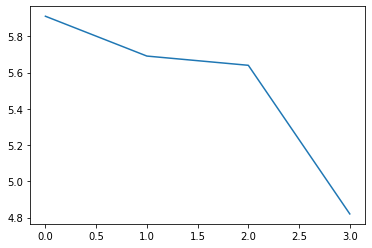

In [74]:
import matplotlib.pyplot as plt

plt.plot(range(len(history.history['loss'])), history.history['loss'])